In [4]:
!gsutil cp gs://gcp-public-data--synthea-fhir-data-10-patients/fhir_r4_ndjson/*.ndjson fhirdata

Copying gs://gcp-public-data--synthea-fhir-data-10-patients/fhir_r4_ndjson/AllergyIntolerance.ndjson...
Copying gs://gcp-public-data--synthea-fhir-data-10-patients/fhir_r4_ndjson/CarePlan.ndjson...
Copying gs://gcp-public-data--synthea-fhir-data-10-patients/fhir_r4_ndjson/Claim.ndjson...
Copying gs://gcp-public-data--synthea-fhir-data-10-patients/fhir_r4_ndjson/Condition.ndjson...
/ [4 files][576.1 KiB/576.1 KiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://gcp-public-data--synthea-fhir-data-10-patients/fhir_r4_ndjson/DiagnosticReport.ndjson...
Copying gs://gcp-public-data--synthea-fhir-data-10-patients/fhir_r4_ndjson/Encounter.ndjson...
Copying gs://gcp-public-data--synthea-fhir-data-10-patients/fhir_r4_ndjson/Explanation

In [1]:
import matplotlib.pyplot as plt
import fhiry.parallel as fp
import os
%matplotlib inline


In [7]:
df = fp.ndjson(os.getcwd() + "/fhirdata/Observation.ndjson",
               '{"REMOVE": ["issued", "meta.profile"], "RENAME": {"id": "resource_id"}}')
print(df.info())


100%|██████████| 1024/1024 [00:04<00:00, 222.19it/s]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024 entries, 0 to 0
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   resourceType                      1024 non-null   object 
 1   resource_id                       1024 non-null   object 
 2   status                            1024 non-null   object 
 3   category                          1024 non-null   object 
 4   effectiveDateTime                 1024 non-null   object 
 5   code.text                         1024 non-null   object 
 6   subject.reference                 1024 non-null   object 
 7   encounter.reference               1024 non-null   object 
 8   valueQuantity.value               806 non-null    float64
 9   valueQuantity.unit                806 non-null    object 
 10  valueQuantity.system              806 non-null    object 
 11  valueQuantity.code                806 non-null    object 
 12  code.codi

In [8]:
print(df.columns)


Index(['resourceType', 'resource_id', 'status', 'category',
       'effectiveDateTime', 'code.text', 'subject.reference',
       'encounter.reference', 'valueQuantity.value', 'valueQuantity.unit',
       'valueQuantity.system', 'valueQuantity.code', 'code.codingcodes',
       'patientId', 'component', 'valueCodeableConcept.text',
       'valueCodeableConcept.codingcodes', 'valueString'],
      dtype='object')


In [9]:
print(df['valueCodeableConcept.codingcodes'])


0            NaN
0            NaN
0            NaN
0            NaN
0            NaN
        ...     
0            NaN
0            NaN
0            NaN
0            NaN
0    [266919005]
Name: valueCodeableConcept.codingcodes, Length: 1024, dtype: object


In [10]:
print(df['code.text'])


0                                          Body Height
0    Pain severity - 0-10 verbal numeric rating [Sc...
0                                          Body Height
0    Pain severity - 0-10 verbal numeric rating [Sc...
0                                          Body Weight
                           ...                        
0                                    Total Cholesterol
0                                        Triglycerides
0                  Low Density Lipoprotein Cholesterol
0                 High Density Lipoprotein Cholesterol
0                          Tobacco smoking status NHIS
Name: code.text, Length: 1024, dtype: object


<AxesSubplot:>

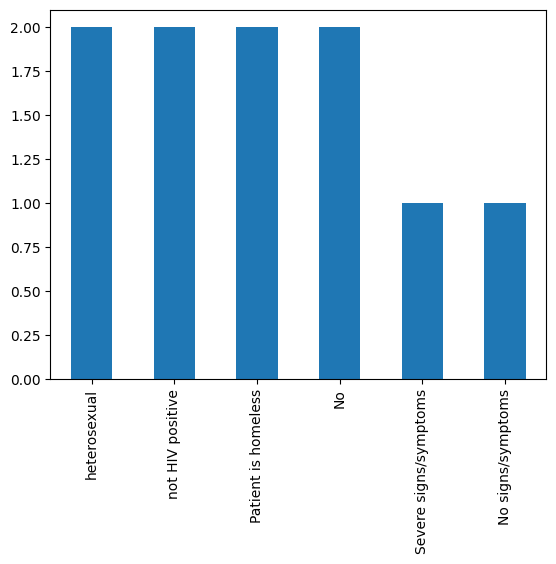

In [11]:
df['valueString'].value_counts().plot(kind='bar')
